# **Bitcoin minute-by-minute predictions**

# This is a work in progress. I am updating this code, and it  will be featured in a Medium article. 

## If this notebook gets 10 upvotes I will release the Inference code notebook for real time deployment.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fix random seed for reproducibility
np.random.seed(7)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
import time
start_time = time.time()

# Load in Data

In [3]:
path_name = "input/392-crypto-currency-pairs-at-minute-resolution/btcusd.csv" 
df = pd.read_csv(path_name, index_col='time')
df.index = pd.to_datetime(df.index, unit='ms')
df = df[~df.index.duplicated(keep='first')]
df = df.resample('1T').pad()

In [4]:
#Get scaled differences between open and close
df['delta'] = (df.close - df.open) / df.open
# Adding a previous close column
df['prev_close'] = df['close'].shift(1)

In [5]:
df.sample(5)

,open,close,high,low,volume,delta,prev_close
time,,,,,,,
2018-06-20 04:44:00,6599.00,6598.90,6599.00,6598.90,0.426753,-0.000015,6599.00
2017-11-10 04:45:00,7259.60,7256.40,7259.80,7250.50,4.703066,-0.000441,7259.80
2014-07-11 18:05:00,628.20,628.20,628.20,628.20,0.125120,0.000000,628.20
2014-10-27 11:39:00,353.23,353.22,353.23,353.22,1.000000,-0.000028,353.22
2017-02-28 11:24:00,1187.00,1187.00,1187.10,1187.00,24.490000,0.000000,1187.00


In [6]:
df.tail(5)

,open,close,high,low,volume,delta,prev_close
time,,,,,,,
2022-02-26 10:48:00,39000.000000,39012.0,39012.0,39000.000000,0.168502,0.000308,39000.0
2022-02-26 10:49:00,39008.000000,38976.0,39008.0,38971.410904,1.341707,-0.000820,39012.0
2022-02-26 10:50:00,38971.755285,39029.0,39029.0,38967.949394,6.989503,0.001469,38976.0
2022-02-26 10:51:00,39027.000000,39092.0,39100.0,39027.000000,4.822631,0.001666,39029.0
2022-02-26 10:52:00,39092.000000,39069.0,39101.0,39067.572686,7.333250,-0.000588,39092.0


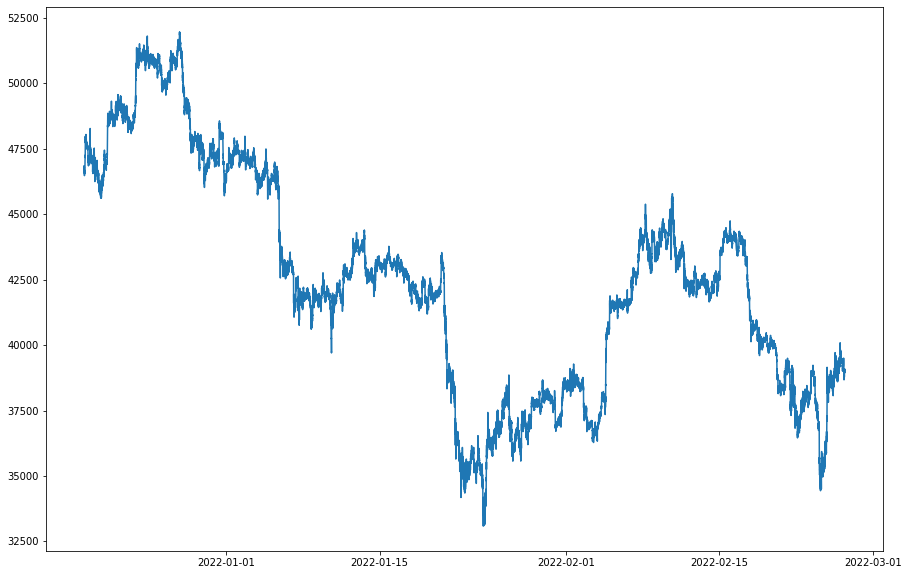

In [7]:
plt.figure(figsize=(15,10))
plt.plot(df.index[-100000:], df.close[-100000:])
plt.show()

# Univariate LSTM

## Prepare Dataset

In [8]:
dataset = df['close'][-100000:].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1, 1)
dataset

array([[46848.],
       [46851.],
       [46774.],
       ...,
       [39029.],
       [39092.],
       [39069.]], dtype=float32)

In [9]:
end_time = time.time()
print(f"Total time: {end_time - start_time} s")

Total time: 5.294290065765381 s
